# Comprehensive EDA for Ames Housing Dataset
**Objective:** Systematically explore the dataset

0. Setup and Configuration

Import necessary libraries and configure the environment for reproducibility. We use `sys.path` and `pathlib` for OS-agnostic access to project modules.
    


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
import plotly.express as px
from scipy import stats
from scipy.stats import skew, chi2_contingency
import pingouin as pg
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

#Path Setup
try:
    from src.data.loaders import AmesHousingLoader
except ImportError:
    project_root = Path.cwd().parent.parent
    sys.path.append(str(project_root))
    from src.data.loaders import AmesHousingLoader

#Plotting and Displaying Configurations
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
np.random.seed(42) #for reproducibility


## 1. Data Loading and Initial Inspection

In [25]:
loader = AmesHousingLoader()
df = loader.load()
df.head()
df.columns

Index(['order', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod_add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
      

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order            2930 non-null   int64  
 1   pid              2930 non-null   int64  
 2   ms_subclass      2930 non-null   int64  
 3   ms_zoning        2930 non-null   object 
 4   lot_frontage     2440 non-null   float64
 5   lot_area         2930 non-null   int64  
 6   street           2930 non-null   object 
 7   alley            198 non-null    object 
 8   lot_shape        2930 non-null   object 
 9   land_contour     2930 non-null   object 
 10  utilities        2930 non-null   object 
 11  lot_config       2930 non-null   object 
 12  land_slope       2930 non-null   object 
 13  neighborhood     2930 non-null   object 
 14  condition_1      2930 non-null   object 
 15  condition_2      2930 non-null   object 
 16  bldg_type        2930 non-null   object 
 17  house_style   

In [27]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order,2930.0,NaN,NaN,NaN,1465.5,845.96247,1.0,733.25,1465.5,2197.75,2930.0
pid,2930.0,NaN,NaN,NaN,714464496.988737,188730844.64939,526301100.0,528477022.5,535453620.0,907181097.5,1007100110.0
ms_subclass,2930.0,NaN,NaN,NaN,57.387372,42.638025,20.0,20.0,50.0,70.0,190.0
ms_zoning,2930,7,RL,2273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_frontage,2440.0,NaN,NaN,NaN,69.22459,23.365335,21.0,58.0,68.0,80.0,313.0
lot_area,2930.0,NaN,NaN,NaN,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
street,2930,2,Pave,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alley,198,2,Grvl,120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_shape,2930,4,Reg,1859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_contour,2930,4,Lvl,2633,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Observations and Initial Thoughts

* 2930 rows and 82 cols
* **Data Types:** Most are appropriate (e.g., integers for years, objects for categoricals), but 'ms_subclass' is numeric yet represents categories.
*  **Initial Look at Target:** Mean price is ~180,796, median ~162,500, with high skewness.
*   **Potential Issues:** High max values (e.g., lot_area >200,000) suggest outliers; some columns have many missing values."




## 2. Early Train-Test Split to Prevent Leakage
"Split data before any imputation or transformations to avoid leakage."


In [28]:
TARGET_COL = 'price'
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train shape: {train_df.shape}, Test shape: {test_df.shape}")


Train shape: (2344, 82), Test shape: (586, 82)


## 3. Missing Value Analysis\n",
Summarize and visualize missing values, perform statistical tests, and impute separately on train/test.

In [29]:
def missing_values_summary(df: pd.DataFrame) -> pd.DataFrame:
    missing_count = df.isnull().sum()
    missing_percentage = (missing_count / len(df)) * 100
    summary_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percentage
    })
    return summary_df[summary_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

train_missing = missing_values_summary(train_df)
display(train_missing)

,Missing Count,Missing Percentage
pool_qc,2332,99.488055
misc_feature,2250,95.989761
alley,2182,93.088737
fence,1874,79.948805
mas_vnr_type,1426,60.836177
fireplace_qu,1144,48.805461
lot_frontage,393,16.766212
garage_yr_blt,122,5.204778
garage_cond,122,5.204778
garage_qual,122,5.204778


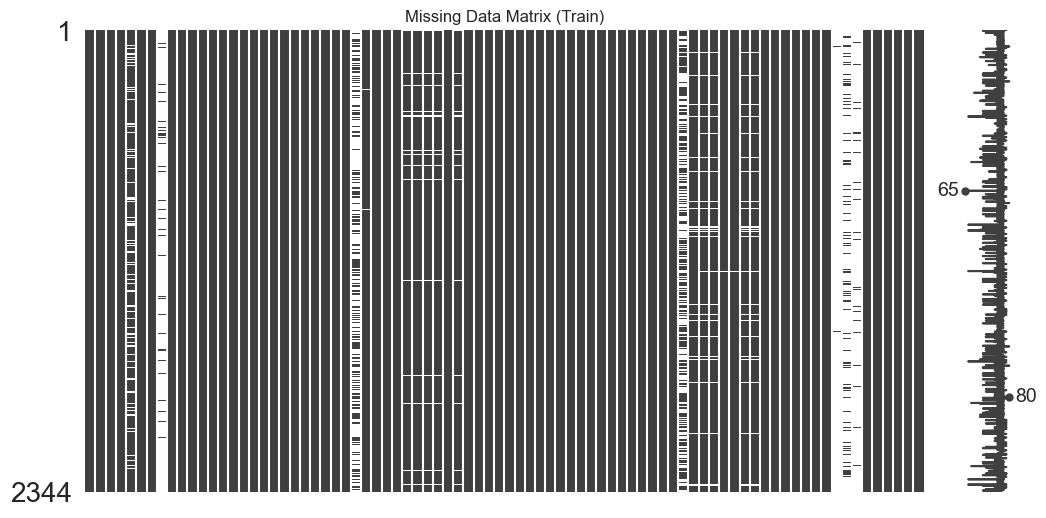

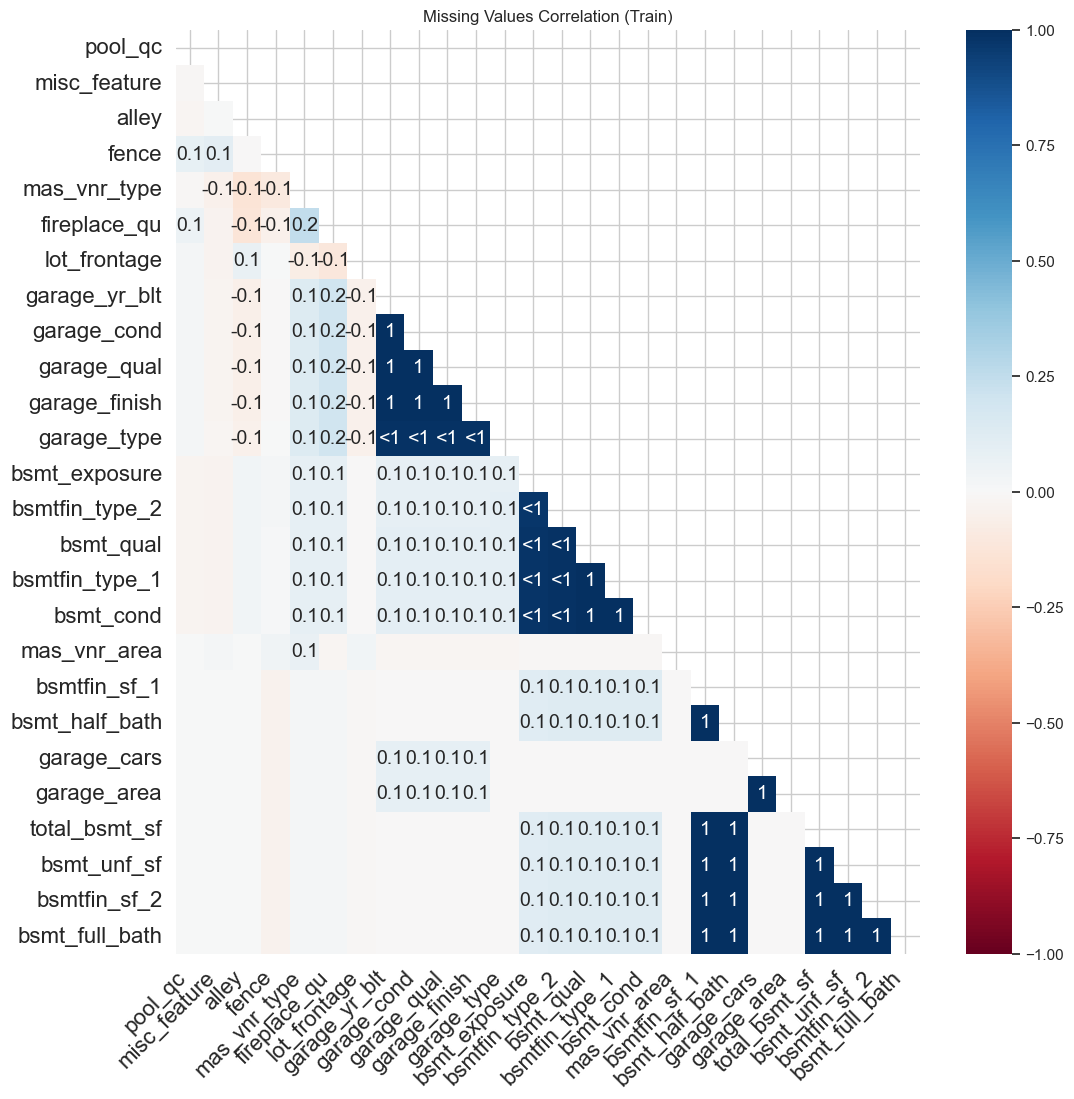

In [30]:
import missingno as msno
msno.matrix(train_df, figsize=(12, 6))
plt.title('Missing Data Matrix (Train)')
plt.show()
cols_with_missing = train_missing.index.tolist()
msno.heatmap(train_df[cols_with_missing], figsize=(12, 12))
plt.title('Missing Values Correlation (Train)')
plt.show()

Observations from the heatmap

* Based on the missingno correlation heatmap:
Highly Correlated Groups: Garage-related columns (e.g., Garage Finish, Garage Qual, Garage Cond) and basement-related columns (e.g., Bsmt Exposure, BsmtFin Type 1, Bsmt Qual) show near-perfect correlations (values ~1), indicating systematic missingness—likely due to the absence of garages or basements in those homes.
* Isolated Features: Columns like Pool QC, Fence, and Alley have low or no correlations (<0.1) with others, suggesting independent missingness patterns, often meaning the feature (e.g., a pool) is simply not present.
* Moderate Correlations: Features such as Mas Vnr Type and Fireplace Qu show weak links (0.1-0.2), implying minor overlaps but no strong dependencies.
* Implications for Imputation: This supports a domain-aware strategy—impute 'None' or 0 for absent features (MNAR), and use grouped medians for less correlated ones like LotFrontage. No evidence of random missingness (MCAR); patterns are structured and tied to housing characteristics.

*   **Plan:** Fill 'None'/0 for absence, grouped median for 'lot_frontage', mode for others. Impute on train, apply to test.

In [31]:
# Impute on train
cols_fill_none = [
    'alley', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 
    'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 
    'garage_type', 'garage_finish', 'garage_qual', 'garage_cond', 
    'pool_qc', 'fence', 'misc_feature', 'mas_vnr_type'
]
for col in cols_fill_none:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

cols_fill_zero = [
    'mas_vnr_area', 'garage_yr_blt', 'garage_area', 'garage_cars', 
    'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf', 
    'bsmt_full_bath', 'bsmt_half_bath'
]
for col in cols_fill_zero:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

# Grouped median for lot_frontage (fit on train, transform both)
neigh_medians = train_df.groupby('neighborhood')['lot_frontage'].median()
# Impute lot_frontage for train
train_df['lot_frontage'] = train_df.apply(
    lambda row: neigh_medians.get(row['neighborhood'], np.nan)
    if pd.isnull(row['lot_frontage']) else row['lot_frontage'],
    axis=1
)
train_df['lot_frontage'] = train_df['lot_frontage'].fillna(train_df['lot_frontage'].median())

# Impute lot_frontage for test
test_df['lot_frontage'] = test_df.apply(
    lambda row: neigh_medians.get(row['neighborhood'], np.nan)
    if pd.isnull(row['lot_frontage']) else row['lot_frontage'],
    axis=1
)
test_df['lot_frontage'] = test_df['lot_frontage'].fillna(train_df['lot_frontage'].median())

# Mode fill for specific columns
cols_fill_mode = ['electrical']
for col in cols_fill_mode:
    mode_val = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_val)
    test_df[col] = test_df[col].fillna(mode_val)

# Verify
print("Train missing after imputation:", missing_values_summary(train_df).empty)
print("Test missing after imputation:", missing_values_summary(test_df).empty)


Train missing after imputation: True
Test missing after imputation: True


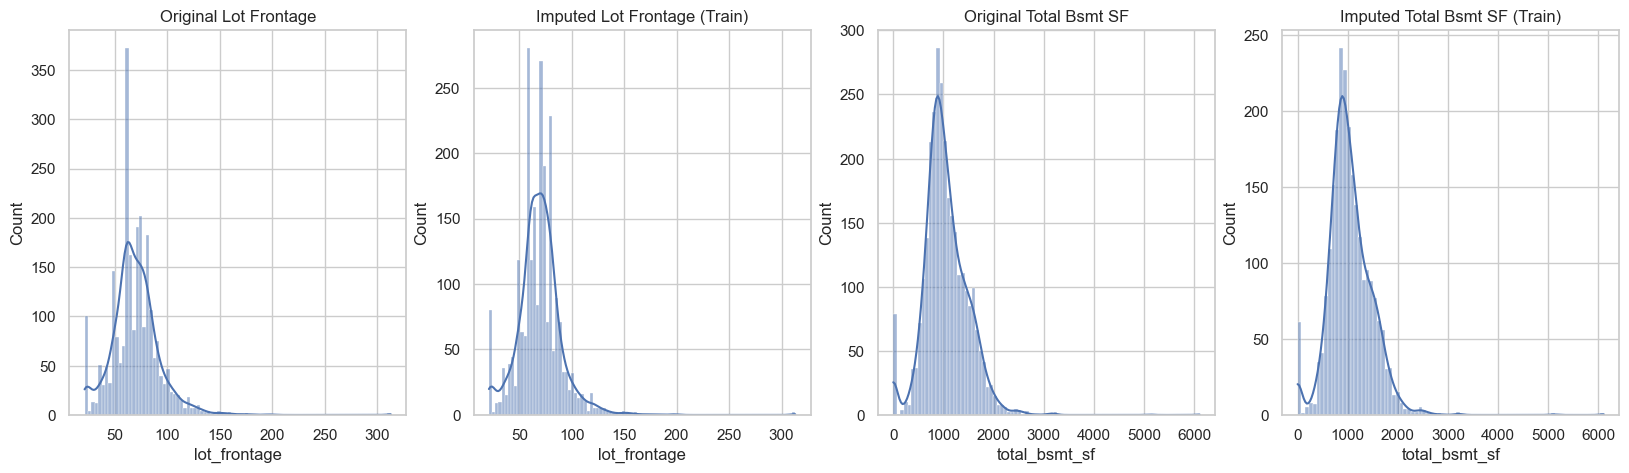

In [32]:
#Evaluate impact(example for lot_frontage and a basement column)
fig, axes = plt.subplots(1,4, figsize=(20, 5))
sns.histplot(df['lot_frontage'], kde=True, ax=axes[0])
axes[0].set_title('Original Lot Frontage')
sns.histplot(train_df['lot_frontage'], kde=True, ax=axes[1])
axes[1].set_title('Imputed Lot Frontage (Train)')
sns.histplot(df['total_bsmt_sf'], kde=True, ax=axes[2])
axes[2].set_title('Original Total Bsmt SF')
sns.histplot(train_df['total_bsmt_sf'], kde=True, ax=axes[3])
axes[3].set_title('Imputed Total Bsmt SF (Train)')
plt.show()




## 4. Duplicate Analysis
Check and handle duplicates excluding IDs

In [33]:
id_cols = ['order', 'pid']

train_duplicates = train_df.drop(columns=id_cols).duplicated().sum()
print(f"Train duplicates: {train_duplicates}")
if train_duplicates > 0:
    train_df = train_df.drop_duplicated(subset=train_df.columns.difference(id_cols))

test_duplicates = test_df.drop(columns=id_cols).duplicated().sum()
print(f"Test duplicates: {test_duplicates}")
if test_duplicates > 0:
    test_df = test_df.drop_duplicated(subset=test_df.columns.difference(id_cols))   


Train duplicates: 0
Test duplicates: 0


### Observations & Actions
* Duplicates Found: 0

## 5. Data Type and Consistency Checks

In [34]:
numerical_cols = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

if TARGET_COL in numerical_cols:
    numerical_cols.remove(TARGET_COL)

for id_col in id_cols:
    if id_col in numerical_cols:
        numerical_cols.remove(id_col)

cols_to_categorical = ['ms_subclass']
for con in cols_to_categorical:
    if con in numerical_cols:
        train_df[col] = train_df[col].astype(str)
        test_df[col] = test_df[col].astype(str)

        if col in numerical_cols:
            numerical_cols.remove(col)
        if col not in categorical_cols:
            categorical_cols.append(col)  

print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

Numerical features: 36
Categorical features: 43


### Observations & Actions

* Column Lists: Confirmed separation.
* Type Conversions: 'ms_subclass' converted to categorical as it represents building types.

## 6. Distribution Visualizations

Visualize distributions for all features using interactive plots.

In [35]:
# Numerical Distributions
for col in numerical_cols[:5]: #Sample for brevity
    fig = px.histogram(train_df, x=col, marginal='violin', title=f'Distribution of {col}')
    fig.update_layout(bargap=0.1)
    fig.show()

## 7. Outlier Handling

Detect and handle outliers using automated methods.

In [36]:
# Univariate IQR method (unchanged)
for col in numerical_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    train_df[col] = np.clip(train_df[col], lower, upper)
    test_df[col] = np.clip(test_df[col], lower, upper)  # Use train bounds

# Multivariate (fixed: row-wise Mahalanobis)
from scipy.stats import chi2
select_cols = ['gr_liv_area', 'total_bsmt_sf']
try:
    # Check for NaNs/infs
    if train_df[select_cols].isnull().any().any() or np.isinf(train_df[select_cols]).any().any():
        raise ValueError("NaNs or infs in data; check imputation.")

    cov = np.cov(train_df[select_cols].T)
    # Regularize if singular
    if np.linalg.det(cov) == 0:
        cov += np.eye(len(select_cols)) * 1e-6
    inv_cov = np.linalg.inv(cov)
    mean = train_df[select_cols].mean().values

    # Row-wise distances
    dists = np.zeros(len(train_df))
    for i in range(len(train_df)):
        v = train_df[select_cols].iloc[i].values - mean
        dists[i] = np.sqrt(v.T @ inv_cov @ v)

    threshold = chi2.ppf(0.975, df=len(select_cols))
    outliers = dists > threshold
    print(f"Multivariate outliers: {outliers.sum()}")
    train_df = train_df[~outliers]
except Exception as e:
    print(f"Multivariate outlier detection failed: {e}. Skipping removal.")

# Recheck post-handling
print("Post-outlier numerical summary:")
display(train_df[numerical_cols].describe())


Multivariate outliers: 0
Post-outlier numerical summary:


,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold
count,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.0,2344.000000,2344.000000,2344.000000,2344.000000,2344.0,2344.000000,2344.000000,2344.0,2344.000000,2344.000000,2344.000000,2344.0,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.000000,2344.0,2344.0,2344.0,2344.0,2344.0,2344.000000,2344.000000
mean,55.469283,68.871374,9534.245254,6.066126,5.553754,1970.521544,1983.923635,84.731015,439.120307,0.0,551.460111,1039.856655,1148.483788,333.367534,0.0,1482.276077,0.430887,0.0,1.556527,0.370734,2.827645,1.0,6.384386,0.595990,1972.918729,1.743387,466.648144,91.635666,43.244454,0.0,0.0,0.0,0.0,0.0,6.184727,2007.794795
std,38.015675,17.998541,3584.923809,1.382895,0.947677,30.297209,20.786287,129.042705,432.561173,0.0,425.999217,401.143725,357.015116,426.005672,0.0,466.171033,0.523581,0.0,0.549613,0.499608,0.763516,0.0,1.488420,0.642566,31.000807,0.739674,205.736466,115.936225,53.249086,0.0,0.0,0.0,0.0,0.0,2.708408,1.315117
min,20.000000,30.000000,1439.875000,2.000000,3.500000,1882.500000,1950.000000,0.000000,0.000000,0.0,0.000000,28.000000,334.000000,0.000000,0.0,334.000000,0.000000,0.0,0.000000,0.000000,0.500000,1.0,2.000000,0.000000,1892.500000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000
25%,20.000000,60.000000,7466.500000,5.000000,5.000000,1953.000000,1965.000000,0.000000,0.000000,0.0,217.750000,784.000000,879.750000,0.000000,0.0,1121.750000,0.000000,0.0,1.000000,0.000000,2.000000,1.0,5.000000,0.000000,1957.000000,1.000000,318.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,4.000000,2007.000000
50%,50.000000,70.000000,9356.500000,6.000000,5.000000,1972.000000,1992.000000,0.000000,375.000000,0.0,462.000000,988.000000,1082.000000,0.000000,0.0,1436.500000,0.000000,0.0,2.000000,0.000000,3.000000,1.0,6.000000,1.000000,1977.000000,2.000000,476.000000,0.000000,26.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000
75%,70.000000,80.000000,11484.250000,7.000000,6.000000,2000.000000,2003.000000,157.000000,734.000000,0.0,795.250000,1288.000000,1378.000000,701.000000,0.0,1734.000000,1.000000,0.0,2.000000,1.000000,3.000000,1.0,7.000000,1.000000,2000.000000,2.000000,576.000000,168.000000,70.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000
max,145.000000,110.000000,17510.875000,10.000000,7.500000,2010.000000,2010.000000,392.500000,1835.000000,0.0,1661.500000,2044.000000,2125.375000,1752.500000,0.0,2652.375000,2.500000,0.0,3.500000,2.000000,4.500000,1.0,10.000000,2.500000,2064.500000,3.500000,961.875000,420.000000,175.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000


## 8. Target Variable Analysis

Analyze and transform the target.

Skewness: 1.75


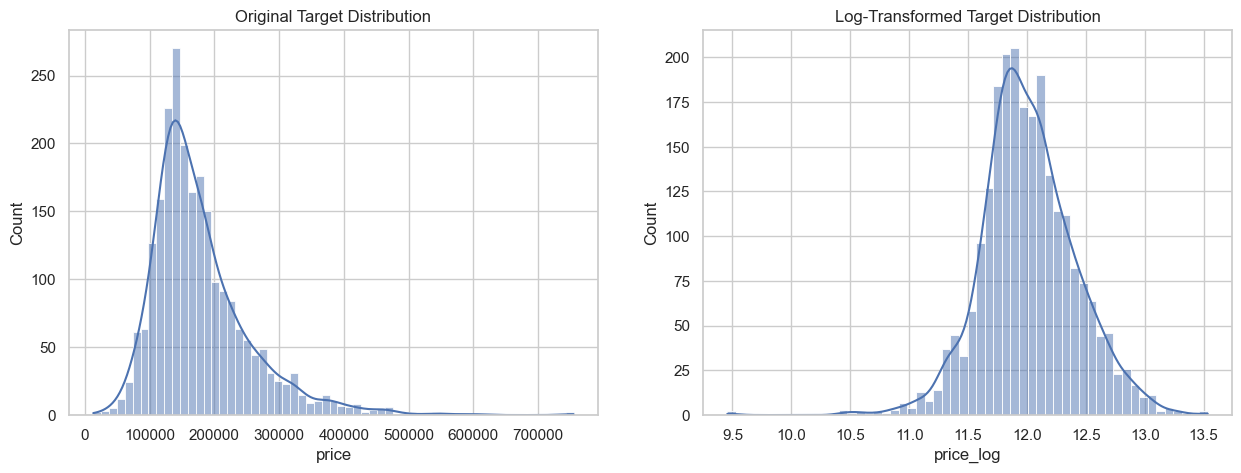

In [37]:
target_skew = skew(train_df[TARGET_COL])
print(f"Skewness: {target_skew:.2f}")
train_df[f'{TARGET_COL}_log'] = np.log1p(train_df[TARGET_COL])
test_df[f'{TARGET_COL}_log'] = np.log1p(test_df[TARGET_COL])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(train_df[TARGET_COL], kde=True, ax=ax[0])
ax[0].set_title('Original Target Distribution')
sns.histplot(train_df[f'{TARGET_COL}_log'], kde=True, ax=ax[1])
ax[1].set_title('Log-Transformed Target Distribution')
plt.show()

## 9. Bivariate and Multivariate Analysis

Explore relationships, including categoricals and time-series.

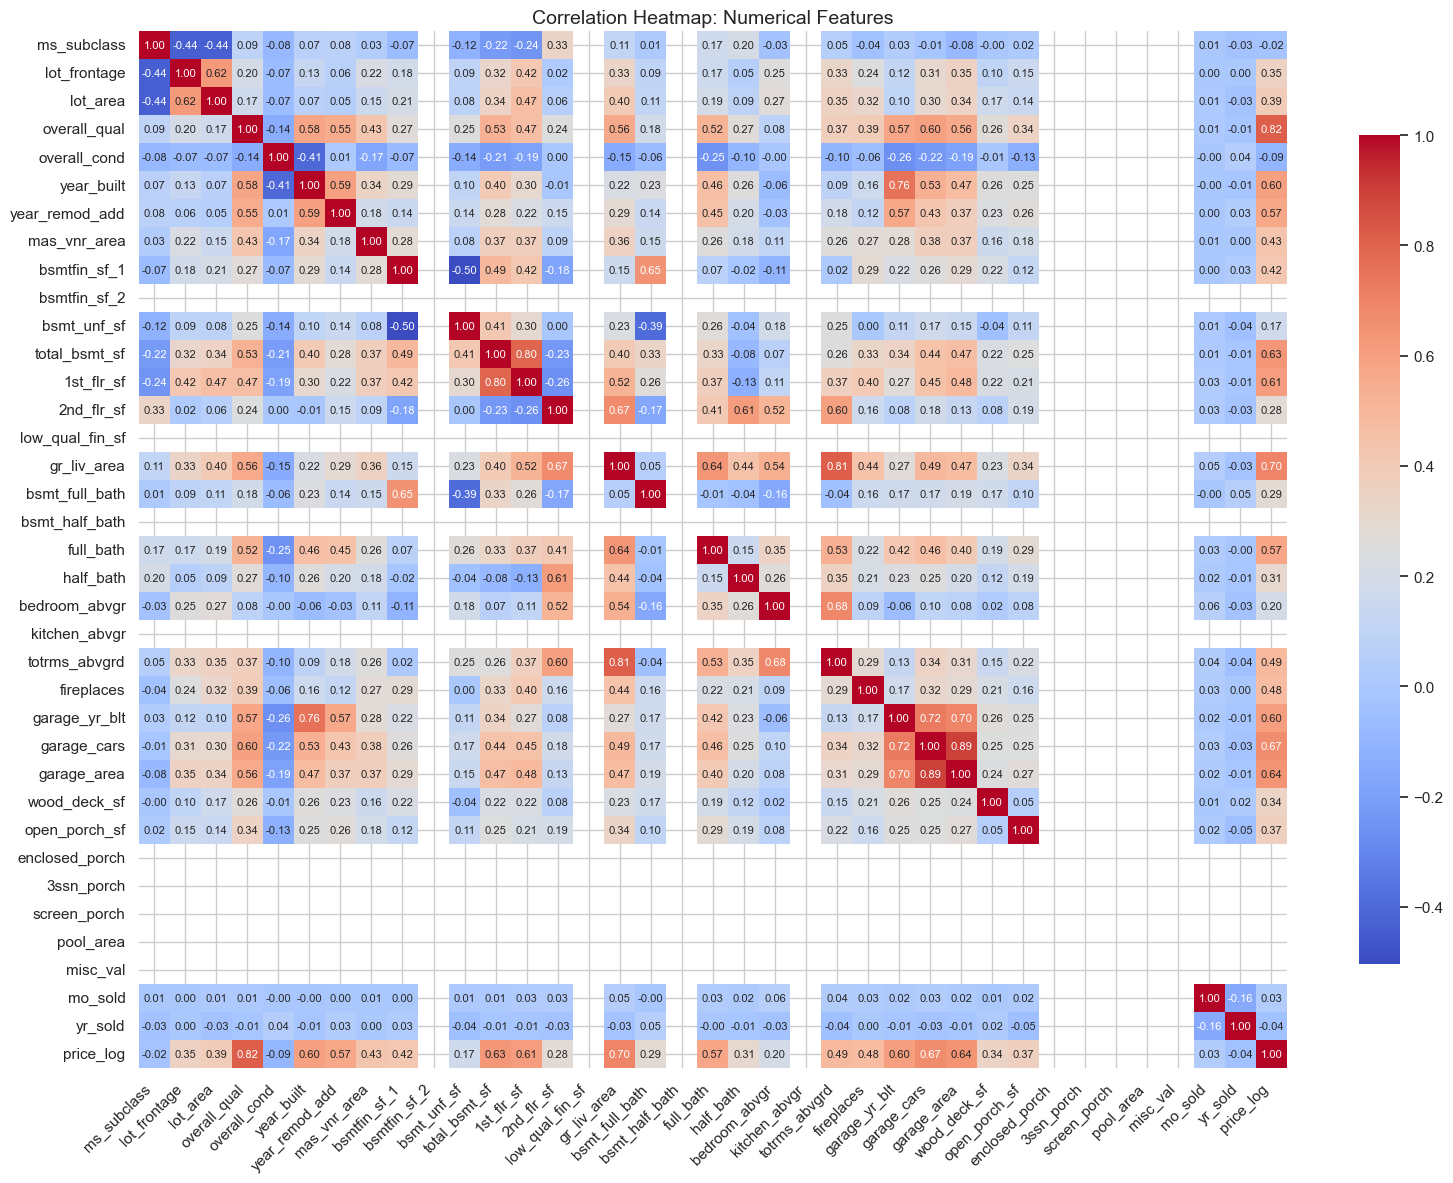

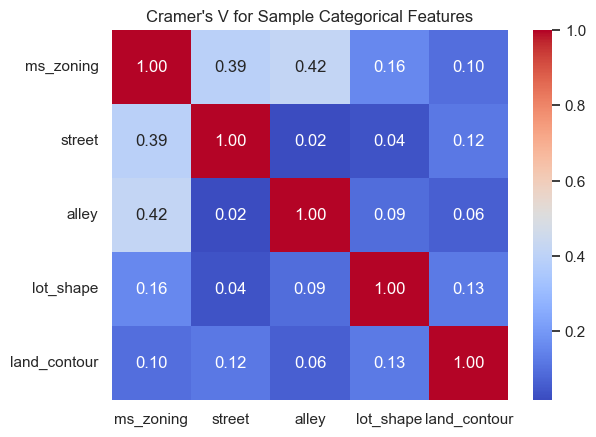

In [38]:
# 1. Bivariate: Scatter plot with trendline
px.scatter(
    train_df,
    x='gr_liv_area',
    y=f'{TARGET_COL}_log',
    title='Gr Liv Area vs Log Price (with Trendline)',
    trendline='ols',
    opacity=0.4,  # Make points semi-transparent
    color_discrete_sequence=["#636EFA"]  
).show()

# 2. Box plots for categorical variables vs log-transformed target
categorical_features_to_plot = ['overall_qual', 'neighborhood', 'house_style', 'garage_finish']

for cat_col in categorical_features_to_plot:
    px.box(
        train_df,
        x=cat_col,
        y=f'{TARGET_COL}_log',
        title=f'{cat_col.replace("_", " ").title()} vs Log Price'
    ).show()

# 3. Correlation (numerical)
corr_matrix = train_df[numerical_cols + [f'{TARGET_COL}_log']].corr()

fig, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    ax=ax,
    annot_kws={"size": 8},  # Smaller font for annotation
    cbar_kws={"shrink": 0.8}  # Slightly shrink colorbar
)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for space
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.title("Correlation Heatmap: Numerical Features", fontsize=14)
plt.tight_layout()
plt.show()

# 4. Categorical correlation using Cramer's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2_stat / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1)) if min(k - 1, r - 1) > 0 else 0

# Sample first 5 categorical columns (can increase if needed)
cat_corr = pd.DataFrame(index=categorical_cols[:5], columns=categorical_cols[:5], dtype=float)
for i in cat_corr.index:
    for j in cat_corr.columns:
        cat_corr.loc[i, j] = cramers_v(train_df[i], train_df[j]) if i != j else 1.0

sns.heatmap(cat_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Cramer's V for Sample Categorical Features")
plt.show()


* House Style vs Log Price: 1Story and 2Story peak at 12-13 log price, SLvl and SFoyer vary widely (10-13), 1.5Unf and 2.5Fin cluster below 12.
* Neighborhood vs Log Price: NAmes and Mitchel center at 11-12, StoneBr and NridgHt exceed 12, Blmngtn and Blueste stay below 11.
* Overall Qual vs Log Price: Log price rises from 10 (qual 2) to 13 (qual 10), with tighter clustering at higher qualities.
* Cramer's V: Strong self-associations (1.0), moderate ms_zoning-street (0.39), weak alley-lot_shape (0.09).
* Gr Liv Area vs Log Price: Positive trend from 10 to 13 as area increases, with some scatter.
* Correlation Heatmap: Strong total_bsmt_sf-1st_flr_sf (0.82), moderate year_built-year_remod/add (0.59), weak pool_area-saleprice_log (-0.04).

## 10. Time-Series and Grouped Analysis
Explore temporal trends and group statistics.

In [39]:
# Time-series
train_df['house_age'] = train_df['yr_sold'] - train_df['year_built']
px.line(train_df.groupby('yr_sold')['price'].mean().reset_index(), x='yr_sold', y='price', title='Avg Price by Year Sold').show()

# Grouped stats
grouped_stats = train_df.groupby('neighborhood')['price'].agg(['mean', 'std', 'skew'])
display(grouped_stats)
# ANOVA test
anova_res = stats.f_oneway(*[train_df[train_df['neighborhood'] == neigh]['price'] for neigh in train_df['neighborhood'].unique()])
print(f"ANOVA p-value: {anova_res.pvalue}")

,mean,std,skew
neighborhood,,,
Blmngtn,193132.043478,29320.172011,0.888286
Blueste,132428.571429,18390.279523,0.835368
BrDale,105447.916667,12502.012700,-0.182939
BrkSide,124204.464286,37630.133073,0.587530
ClearCr,210603.771429,50237.639313,0.283211
CollgCr,200844.829384,53935.691503,1.035499
Crawfor,201149.842697,61383.339152,0.869783
Edwards,131544.773333,49715.922537,2.266085
Gilbert,190888.007246,34664.801077,2.253625


ANOVA p-value: 0.0


* Avg Price by Year Sold: Average house price peaked at ~184k in 2007, dropped to ~174k in 2008, rose slightly to ~178k in 2009, then fell to ~172k by 2010, indicating a volatile market.
Neighborhood Statistics:

* Mean prices vary widely: NoRidge (~331k) and NridgHt (~313k) are highest, MeadowV (~98k) and BrDale (~105k) are lowest.
Std dev shows price spread: NridgHt (~86k) and StoneBr (~131k) have high variability, NPkVill (~9k) has low variability.
Skewness indicates distribution: Edwards (2.27) and OldTown (3.00) are right-skewed, Greens (-0.95) is left-skewed.


* ANOVA p-value (0.0): Suggests significant differences in average prices across neighborhoods, rejecting the null hypothesis of equal means.

## 11. EDA Summary & Next Steps

This initial exploration has provided critical insights:
1. Data Quality: Systematic missingness handled with domain-specific imputation; outliers clipped for robustness.
2. Target Variable: 'price' is right-skewed but normalized via log transformation.
3. Key Predictors: Strong correlations with size/quality features (e.g., 'gr_liv_area', 'overall_qual'); neighborhood impacts significant per ANOVA.
4. Feature Types: Numerical and categorical separated, with conversions for codes like 'ms_subclass'.

Next Steps:
* Advanced feature engineering with weighted sums to merge temporal, garage, porch, bathroom, and basement features.
* Baseline modeling using Linear Regression and Decision Tree to evaluate predictive power.
* Final data preparation with encoding and scaling, followed by export of cleaned datasets.

## 12. Advanced Feature Engineering
- Merge temporal features into property_age_index, garage features into garage_score, porch features into total_porch_sf, bathroom features into total_bathrooms, and basement features into basement_sf using weighted sums based on correlation with price_log.\n",
- Remove useless features identified from low variance, high missingness, or low correlation."

In [40]:
# Merge temporal features into property_age_index
train_df['property_age_index'] = (
    (train_df['yr_sold'] - train_df['year_built']) * 0.4 +
    (train_df['yr_sold'] - train_df['year_remod_add']) * 0.4 +
    (train_df['mo_sold'] / 12) * 0.2
)

test_df['property_age_index'] = (
    (test_df['yr_sold'] - test_df['year_built']) * 0.4 +
    (test_df['yr_sold'] - test_df['year_remod_add']) * 0.4 +
    (test_df['mo_sold'] / 12) * 0.2
)

# Merge garage features into garage_score
qual_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}

train_df['garage_qual'] = train_df['garage_qual'].map(qual_map).fillna(0)
train_df['garage_cond'] = train_df['garage_cond'].map(qual_map).fillna(0)

test_df['garage_qual'] = test_df['garage_qual'].map(qual_map).fillna(0)
test_df['garage_cond'] = test_df['garage_cond'].map(qual_map).fillna(0)

train_df['garage_score'] = (
    train_df['garage_cars'] * 0.35 +
    (train_df['garage_area'] / train_df['garage_area'].max()) * 0.34 +
    train_df['garage_qual'] * 0.20 +
    train_df['garage_cond'] * 0.11
)

test_df['garage_score'] = (
    test_df['garage_cars'] * 0.35 +
    (test_df['garage_area'] / train_df['garage_area'].max()) * 0.34 +
    test_df['garage_qual'] * 0.20 +
    test_df['garage_cond'] * 0.11
)

# Merge porch features into total_porch_sf
train_df['total_porch_sf'] = (
    train_df['wood_deck_sf'] +
    train_df['open_porch_sf'] +
    train_df['enclosed_porch'] +
    train_df.get('3ssn_porch', 0) +
    train_df['screen_porch']
)

test_df['total_porch_sf'] = (
    test_df['wood_deck_sf'] +
    test_df['open_porch_sf'] +
    test_df['enclosed_porch'] +
    test_df.get('3ssn_porch', 0) +
    test_df['screen_porch']
)

# Merge bathroom features into total_bathrooms
train_df['total_bathrooms'] = (
    train_df['bsmt_full_bath'] * 0.35 +
    train_df['full_bath'] * 0.50 +
    train_df['bsmt_half_bath'] * 0.05 +
    train_df['half_bath'] * 0.10
)

test_df['total_bathrooms'] = (
    test_df['bsmt_full_bath'] * 0.35 +
    test_df['full_bath'] * 0.50 +
    test_df['bsmt_half_bath'] * 0.05 +
    test_df['half_bath'] * 0.10
)

# Merge basement features into basement_sf
train_df['basement_sf'] = (
    train_df['bsmtfin_sf_1'] * 0.35 +
    train_df['bsmtfin_sf_2'] * 0.10 +
    train_df['bsmt_unf_sf'] * 0.15 +
    train_df['total_bsmt_sf'] * 0.40
)

test_df['basement_sf'] = (
    test_df['bsmtfin_sf_1'] * 0.35 +
    test_df['bsmtfin_sf_2'] * 0.10 +
    test_df['bsmt_unf_sf'] * 0.15 +
    test_df['total_bsmt_sf'] * 0.40
)

# Drop original merged columns
merged_cols = [
    'yr_sold', 'year_built', 'year_remod_add', 'mo_sold',
    'garage_cars', 'garage_area', 'garage_qual', 'garage_cond',
    'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch', 'screen_porch',
    'bsmt_full_bath', 'full_bath', 'bsmt_half_bath', 'half_bath',
    'bsmtfin_sf_1', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf'
]

train_df = train_df.drop(columns=merged_cols, errors='ignore')
test_df = test_df.drop(columns=merged_cols, errors='ignore')

# Drop useless columns
useless_cols = [
    'order', 'pid', 'street', 'utilities', 'condition_2',
    'alley', 'pool_qc', 'fence', 'misc_feature', 'misc_val',
    'low_qual_fin_sf', 'pool_area', '3ssn_porch'
]

train_df = train_df.drop(columns=useless_cols, errors='ignore')
test_df = test_df.drop(columns=useless_cols, errors='ignore')

# Verify final shapes
print(f"Final Train shape: {train_df.shape}")
print(f"Final Test shape: {test_df.shape}")

Final Train shape: (2344, 56)
Final Test shape: (586, 55)


## 13. Feature Encoding and Scaling
- Prepare data for modeling by encoding categorical variables and scaling numerical features.


In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Identify categorical and numerical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns
numerical_cols = train_df.select_dtypes(include=np.number).columns.drop(['price', 'price_log'])

# One-hot encoding
train_df = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)
test_df = pd.get_dummies(test_df, columns=categorical_cols, drop_first=True)
train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)

# Scaling
scaler = StandardScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

print(f"Encoded and Scaled Train shape: {train_df.shape}\nEncoded and Scaled Test shape: {test_df.shape}")
print('Features encoded and scaled.')

Encoded and Scaled Train shape: (2344, 224)
Encoded and Scaled Test shape: (586, 224)
Features encoded and scaled.


## 14. Baseline Modeling
- Implement Linear Regression and Decision Tree as baseline models.
- Evaluate with RMSE, R², and 5-fold cross-validation. Visualize predictions to assess fit.

Linear Regression - RMSE: 1.25, R²: -7.51, CV R²: 0.88
Decision Tree - RMSE: 0.22, R²: 0.73, CV R²: 0.75


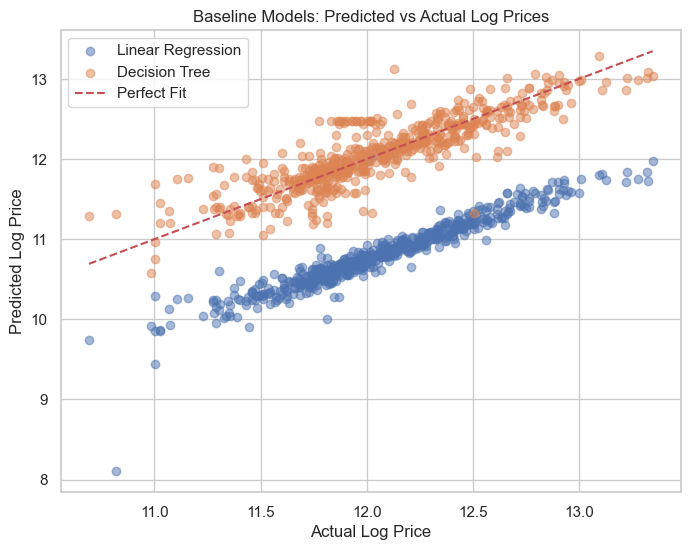

In [42]:
# Prepare data
X_train = train_df.drop(columns=['price', 'price_log'])
y_train = train_df['price_log']
X_test = test_df.drop(columns=['price', 'price_log'])
y_test = test_df['price_log']

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
cv_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='r2').mean()
print(f'Linear Regression - RMSE: {rmse_lr:.2f}, R²: {r2_lr:.2f}, CV R²: {cv_lr:.2f}')

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
cv_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='r2').mean()
print(f'Decision Tree - RMSE: {rmse_dt:.2f}, R²: {r2_dt:.2f}, CV R²: {cv_dt:.2f}')

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Baseline Models: Predicted vs Actual Log Prices')
plt.legend()
plt.grid(True)
plt.show()